Analisis de un amplificador clase B exitado con AM.

Se estudiara la respuesta de un amplificador clase B exitado con una senal AM. 

La transferencia del transistor se define en la funcion idi(v).




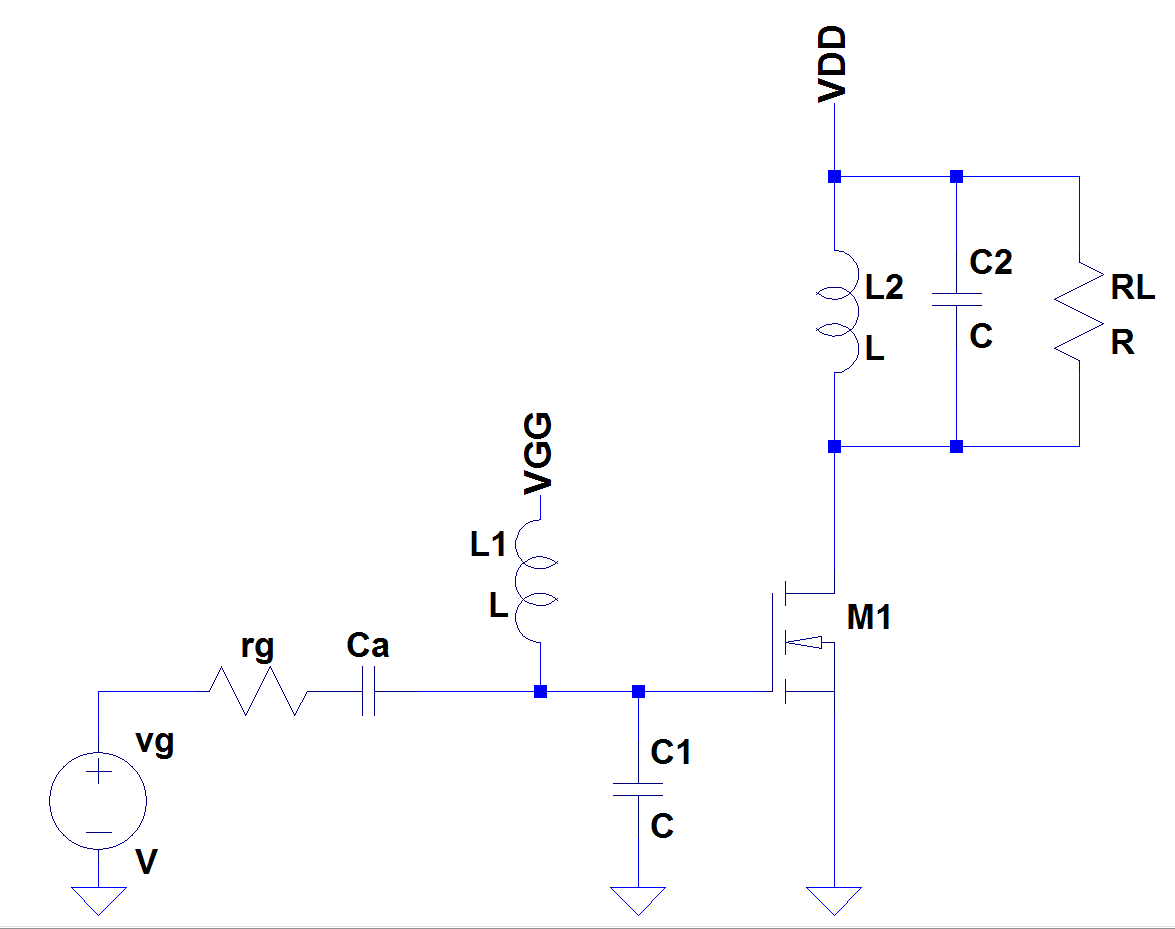

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
from math import cos, log10 
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image  
from scipy import signal
params = {'legend.fontsize': 24,
          'figure.figsize': (15, 5),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

Image(filename= "/home/aalmela/Dropbox/EAIII/04- Ejercitacion/clase c/figures/ejercicio_1lt.png",width=550)

In [84]:
#parametros de la senal AM
amp = 8.8    #amplitud de la portadora
fc  = 100    #frecuencia de la portadora
m   = 0.7      #indice de modulacion
fm  = 2 


#tiempo de un periodo de la modulante
Tm  = 1/fm


#delta time para el calculo de los armonicos
fs  = 24 * fc 
dt  = 1/fs

# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)


#parametros del filtro de salida
fo = fc
BW = 2*fm*5
Qc = fo/BW

#parametros del transistor
Vgs_min = 10 
Vgs_max = 200

Respesta del transistor

Esta funcion representa la respuesta del transistor

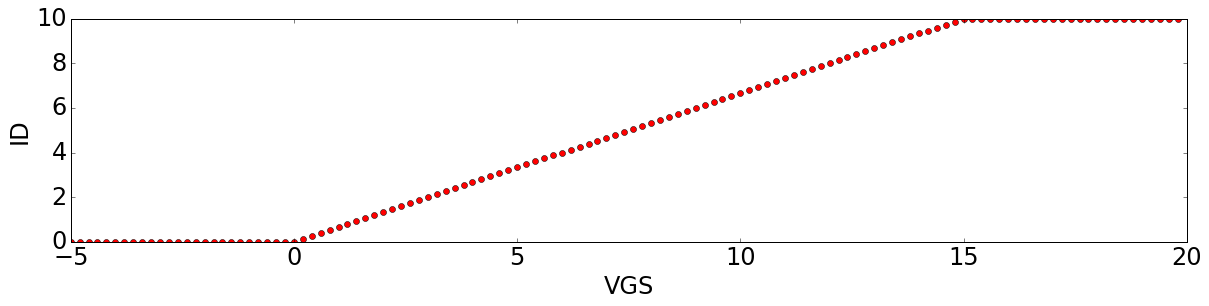

In [85]:
def vgsi(VGG,Vs,th):
    return VGG+Vs*cos(th)

def idi(v):
    i = 0. if (v < 0.)  else 0
    i = (10./15.)*(v-0.) if (v >= 0  and v < 15) else i
    i = (10.) if (v >= 15 ) else i
    return i
vgs = np.arange(-5.,20.,0.2)

ids = []
for v in vgs:
    ids.append(idi(v))
#%matplotlib inline
#plt.gca().cla()
plt.plot(vgs,ids,'ro')
#plt.axis([-10, 10, -1, 11])
plt.ylabel('ID')
plt.xlabel('VGS')
plt.rcParams['figure.figsize'] = (20.0, 4.0)
plt.show()

Plot de la respesta

Se define la funcion de la tension de entrada vgs como una senal AM

In [161]:
def vam(amp,m,vm,th):
    return amp*(1+m*vm)*cos(th)

def sqr(amp,d,th):
    return signal.square(th+np.pi/2,duty=d) 


Plot de la senal AM

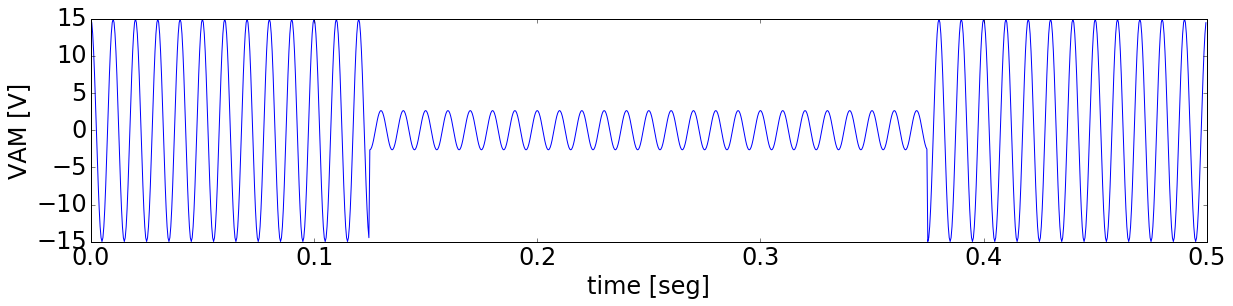

In [162]:
time = np.arange(0,Tm,dt)
vgs = []
for t in time:
    vm = sqr(1,d,2 * np.pi * fm * t)
    vgs.append(vam(amp, m , vm, 2*np.pi*fc*t))

plt.plot(time,vgs)
plt.xlabel('time [seg]')
plt.ylabel('VAM [V]')
plt.show()

Analisis de Fourier para la senal AM de entrada

In [163]:
vin_f = []
maxArmon = int()
armonicos = np.arange(0,fs/2,fm)
for a,f in enumerate(armonicos): 
    if a == 0 : 
        vin_o = 0.0
        for x,t in enumerate(time):
            vin_o = vin_o + vgs[x]*dt/Tm
        vin_f.append(vin_o)
    else : 
        vin_a = 0.0
        for x,t in enumerate(time):
            vin_a = vin_a + vgs[x]*dt*np.cos(2*np.pi*fm*t*a)*2/Tm  + vgs[x]*dt*np.sin(2*np.pi*fm*t*a)*2/Tm
        vin_f.append(vin_a)
       


(80, 120)

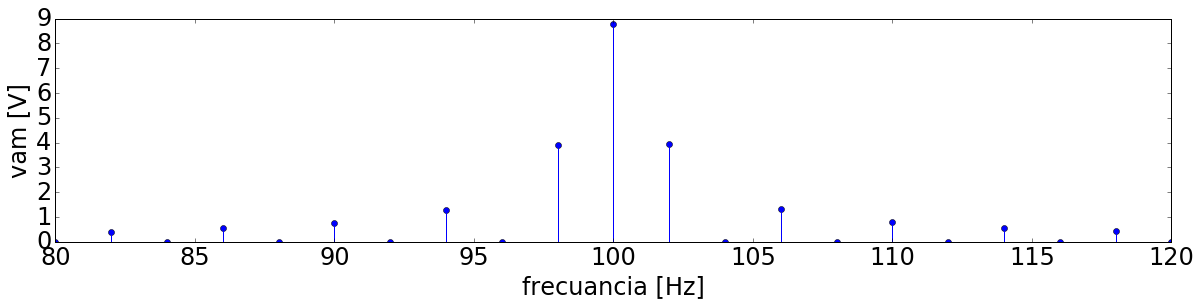

In [164]:
plt.stem(armonicos[:],np.abs(vin_f[:]) ) 
plt.xlabel('frecuancia [Hz]')
plt.ylabel('vam [V]')
plt.xlim([80,120])


Corriente de salida del transistor 

En un clase B todos los pulsos de corriente tiene un angulo de circulacion 

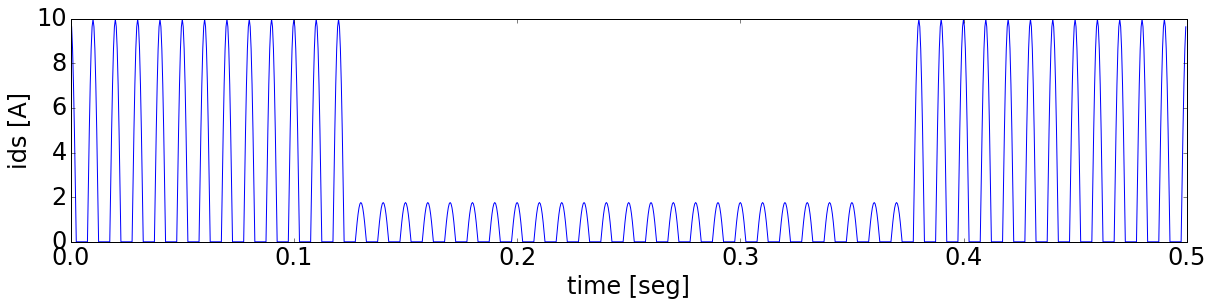

In [165]:
ids = []
for x,t in enumerate(time):
    ids.append(idi(vgs[x]))

plt.plot(time,ids)
plt.xlabel('time [seg]')
plt.ylabel('ids [A]')

Analisis de Fourier para la corriente de salida

In [166]:
iout_f = []

for a,f in enumerate(armonicos): 
    if a == 0 : 
        iout_o = 0.0
        for x,t in enumerate(time):
            iout_o = iout_o + idi(vgs[x])*dt/Tm
        iout_f.append(iout_o)
    else : 
        iout_a = 0.0
        for x,t in enumerate(time):
            iout_a = iout_a + idi(vgs[x])*dt*np.cos(2*np.pi*fm*t*a)*2/Tm + idi(vgs[x])*dt*np.sin(2*np.pi*fm*t*a)*2/Tm
        iout_f.append(iout_a)



(80, 120)

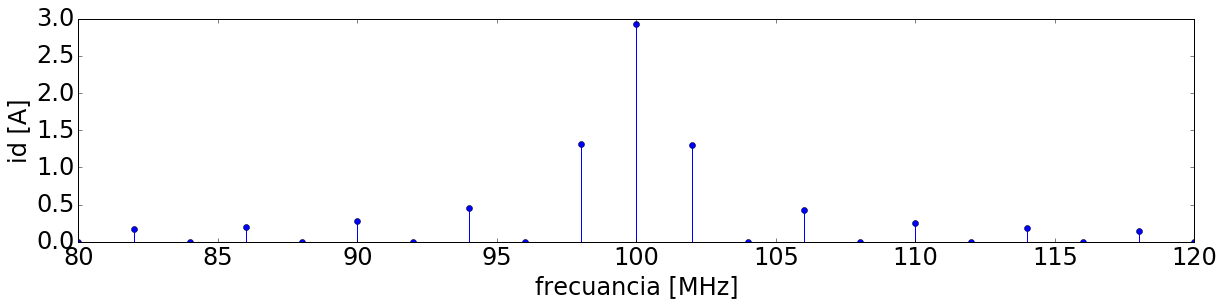

In [167]:

plt.stem(armonicos[:],np.abs(iout_f[:]) ) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('id [A]')
plt.xlim([80,120])

Analisis de la senal de salida
Calculo de primer armonico y continua de la portadora cada 360/n grados de la modulante

In [189]:
n    = 24
th_c = np.arange(-np.pi,np.pi,2*np.pi/n)
th_m = np.arange(-np.pi,np.pi,2*np.pi/n)

In [199]:
ids = dict() # corriente de salida
idf1 = dict() # auxiliar para el calculo de primer armonico
idf2 = dict() # auxiliar para el calculo de primer armonico
idf3 = dict() # auxiliar para el calculo de primer armonico
idf4 = dict() # auxiliar para el calculo de primer armonico
idf5 = dict() # auxiliar para el calculo de primer armonico



ido  = list() # componente continua de portadora para distintos valores de la modulante
id1  = list() # componente primer armonico de la portadora para distintos valores de la modulante  
id2  = list() # componente primer armonico de la portadora para distintos valores de la modulante  
id3  = list() # componente primer armonico de la portadora para distintos valores de la modulante  
id4  = list() # componente primer armonico de la portadora para distintos valores de la modulante  
id5  = list() # componente primer armonico de la portadora para distintos valores de la modulante  


for t_m in th_m: # cada 360/n grados de la modulante
    if t_m not in ids : ids[t_m] = list()
    if t_m not in idf1 : idf1[t_m] = list()
    if t_m not in idf2 : idf2[t_m] = list()
    if t_m not in idf3 : idf3[t_m] = list()
    if t_m not in idf4 : idf4[t_m] = list()
    if t_m not in idf5 : idf5[t_m] = list()
        
    for t_c in th_c: # calculo DC y primer armonico de la portadora
        vm  = sqr(1,d,t_m)
        vgs = vam(amp,m,vm,t_c)
        ids[t_m].append(idi(vgs))
        idf1[t_m].append(idi(vgs)*cos(t_c*1) )
        idf2[t_m].append(idi(vgs)*cos(t_c*2) )
        idf3[t_m].append(idi(vgs)*cos(t_c*3) )
        idf4[t_m].append(idi(vgs)*cos(t_c*4) )
        idf5[t_m].append(idi(vgs)*cos(t_c*5) )

        
        
    ido.append(1/n * sum(ids[t_m])) 
    id1.append(2/n * sum(idf1[t_m]))
    id2.append(2/n * sum(idf2[t_m]))
    id3.append(2/n * sum(idf3[t_m]))
    id4.append(2/n * sum(idf4[t_m]))
    id5.append(2/n * sum(idf5[t_m]))
           

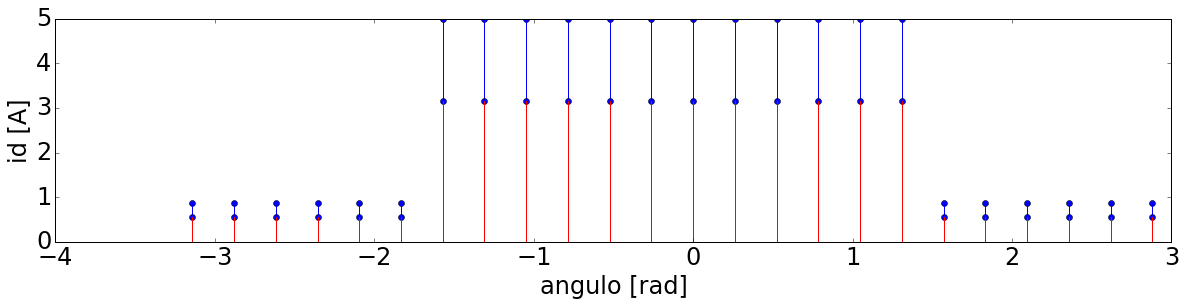

In [200]:
plt.stem(th_m,id1)
plt.stem(th_m,ido,'r')
plt.xlabel('angulo [rad]')
plt.ylabel('id [A]')
#print(id1)

Eliminando el nivel de continua 

In [215]:

id1_o = 1/n * sum(id1)
id1s  = list(id1)
for x,t in enumerate(th_m):
    id1s[x] = id1s[x] - id1_o 
    
print(id1_o)    

2.93333333333


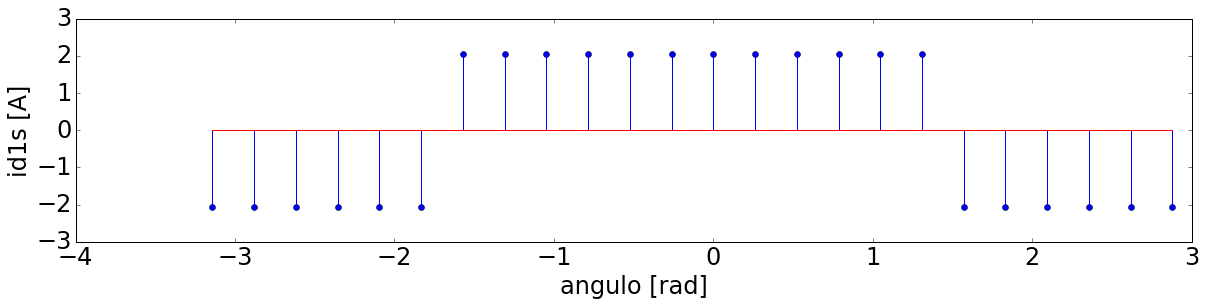

In [216]:
plt.stem(th_m,id1s) 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

Para el calculo de la distorsion, Dist = 2 Veff/(v_1)^2 - 1 

In [217]:
ieff = 0.0
for x,t_m in enumerate(th_m) :
    ieff = ieff + id1s[x]**2
ieff = (ieff / n)
print('De la envolvente ieff=',ieff)

De la envolvente ieff= 4.21617777778


In [218]:
id1s_fs = []
id1s_fc = []

for x, t_m in enumerate(th_m): # cada 360/n grados de la modulante
    id1s_fs.append(id1s[x]*np.sin(t_m))
    id1s_fc.append(id1s[x]*np.cos(t_m))
id1s_1 = (2/n * sum(id1s_fs) + 2/n * sum(id1s_fc) )

print('De la envolvente id1=',id1s_1)


De la envolvente id1= 2.25721362969


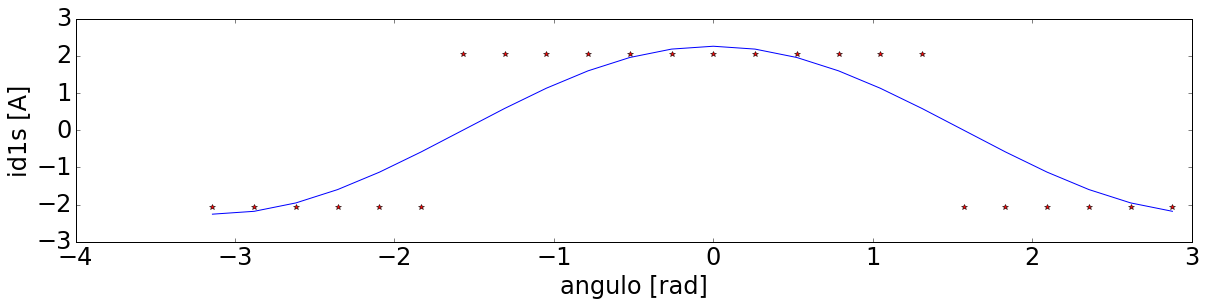

In [213]:
id1st = []
for t_m in th_m:
    id1st.append(id1s_1*np.cos(t_m))
    
plt.plot(th_m,id1s,'r*', th_m,id1st, 'b-') 
plt.xlabel('angulo [rad]')
plt.ylabel('id1s [A]')

In [214]:
dist = (2*ieff/id1s_1**2 - 1) * 100

print('distorsion=',  dist ,'%')

distorsion= 65.5021281224 %


In [188]:

#Poradora en condicion de Pico
idcpo = ido[13] 
idcp1 = id1[13]

#Poradora en condicion de valle
idcvo = ido[0] 
idcv1 = id1[0]

print('Portadora en pico de modulante (solo el primer arminico) => idcpo=',idcpo,'A , idcp1=',idcp1,'A')
print('Portadora en valle de modulante (solo el primer arminico)=> idcvo=',idcvo,'A , idcv1=',idcv1,'A')



Portadora en pico de modulante (solo el primer arminico) => idcpo= 0.560179322233 A , idcp1= 0.88 A
Portadora en valle de modulante (solo el primer arminico)=> idcvo= 0.560179322233 A , idcv1= 0.88 A


In [129]:
#calculo de la resistencia de carga de salida teniendo la portadora en pico para el primer armonico de la modulante
Vp  = (Vgs_max-Vgs_min)/ 2
VDD = Vp + Vgs_min
print('VDD=', VDD, 'V')
print('Vp=' , Vp, 'V')

RL = Vp / idcp1
print('RL=', RL, 'ohms')
 

VDD= 105.0 V
Vp= 95.0 V
RL= 19.050802139 ohms


Calculo de las potencias

In [132]:
#Portadora en pico 
PDC_cp = idcpo * VDD
PRL_cp = idcp1 * Vp / 2
PTR_cp = PDC_cp - PRL_cp

#Portadora en valle 
PDC_cv = idcvo * VDD
PRL_cv = idcv1 * Vp / 2
PTR_cv = PDC_cv - PRL_cv



print('Potencia de portadora en pico    => PDC =', PDC_cp,'W, PRL=', PRL_cp,'W, PTR=',  PTR_cp, 'W.')
print('Potencia de portadora en valle   => PDC =', PDC_cv,'W, PRL=', PRL_cv,'W, PTR=',  PTR_cv, 'W.')

Potencia de portadora en pico    => PDC = 331.428071119 W, PRL= 236.866666667 W, PTR= 94.5614044519 W.
Potencia de portadora en valle   => PDC = 58.487306668 W, PRL= 41.8 W, PTR= 16.687306668 W.


Estos pulsos de corriente son filtrados por un simple sintonizado 

In [133]:
def SS(vin,f, Qc, fo):
    return vin*abs(1/(1+(Qc*(f/fo-fo/f))**2)**0.5)

In [138]:
#calculo de la transferencia del filtro
vout_f = []
for x,i in enumerate(iout_f):
    if x == 0 : continue
    vout_f.append(SS(i*RL,armonicos[x],Qc,fo))

(0, 220)

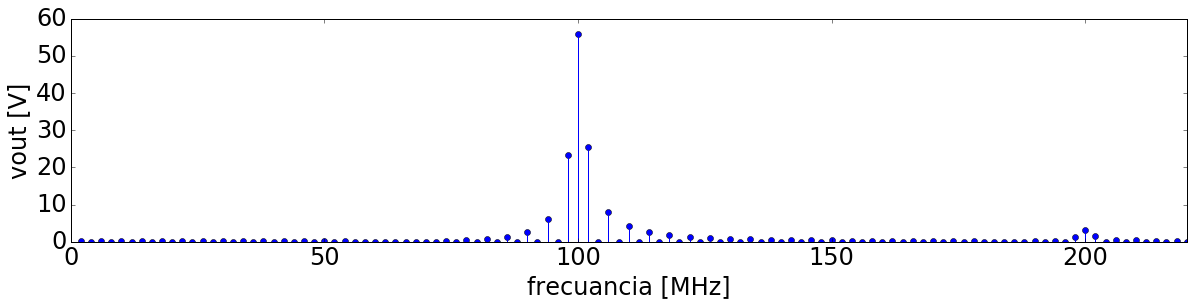

In [140]:
plt.stem(armonicos[1:],np.abs(vout_f[:]) ) 
plt.xlabel('frecuancia [MHz]')
plt.ylabel('vout [V]')
plt.xlim([0,220])